In [1]:
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import math

In [2]:
def read_csv(path):
    rows = []
    with open(path) as file:
        reader = csv.reader(file)
        for row in reader:
            rows.append(row)
    return rows

In [3]:
def list_range(low, high_exclusive, increment = 1):
    arr = []
    for x in range(low, high_exclusive, increment):
        arr.append(x)
    return arr

In [4]:
def average_list(lst):
    if len(lst) != 0:
        return sum(lst) / len(lst)
    else:
        return 0

In [5]:
def average_list_of_lists(list_of_lists):
    new_list = []
    for lst in list_of_lists:
        new_list.append(average_list(lst))
    return new_list

In [6]:
def bucket(rows, bucket_by_row_index, increment, row_index_for_value_added_to_bucket):
    data = [[]]
    rows = sorted(rows[1:], key=lambda x: int(x[bucket_by_row_index]))
    bucket_number = 0
    for row in rows[1:]:
        rank = int(row[bucket_by_row_index])
        if (rank < 1):
            continue
        while (rank > (bucket_number+1) * increment):
            bucket_number += 1
            data.append([])
        data[bucket_number].append(int(row[row_index_for_value_added_to_bucket]))
    return data

In [7]:
def read_data(path, row_index):
    rows = read_csv(path)
    bucket_by_row_index = 0
    increment = 100
    data = bucket(rows, bucket_by_row_index, increment, row_index)
    return data

In [10]:
def denmark_b_to_bounded(x):
    return {
        0: 0,
        50: 1008396,
        100: 1412775,
        150: 1677034,
        250: 1899676,
        400: 2070718, 
        800: 2236118,
        1000: 2315189,
        1800: 2421319,
        2800: 2532939,
        4600: 2663598,
        7400: 2807418,
        12000: 2960212,
        19400: 3126141,
        31400: 3288177,
        50800: 3405971,
        101600: 3499382,
        203200: 3518897
    }[x]

In [30]:
def csv_to_list(csv_rows, row_index):
    lst = []
    for row in csv_rows:
        lst.append(int(row[row_index]))
    return lst

[1, 14612492, 39167467, 115316310, 212622377, 441862101, 924653322, 1749097175, 4321303565, 10739224372, 28734200918, 76471651500, 198577749167, 513863762445, 1250614333748, 1847288390991, 2010824318363]


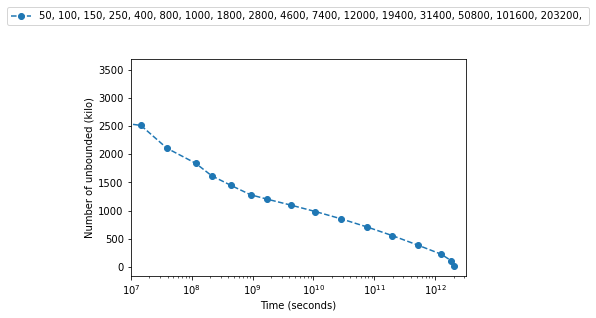

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# plot
fig, ax = plt.subplots()


folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/denmark"
file_numbers = [5]
labels = ['1', '2', '3']
bound_search_limiters = [50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000, 19400, 31400, 50800, 101600, 203200]

for file_number in file_numbers:
    file_name = "/preprocessingExperiment"+str(file_number)+".txt"
    path = folder_path + file_name
    #read
    csv_rows = read_csv(path)
    #relevat row to list
    bounds = bound_search_limiters# csv_to_list(csv_rows[1:], 0)
    unbounded = csv_to_list(csv_rows[1:], 0)
    bounded = csv_to_list(csv_rows[1:], 1)
    times = csv_to_list(csv_rows[1:], 2)
    # Calculate aggregate times
    aggregate_times = [0 for i in range(len(times))]
    for i in range(0,len(times)):
        aggregate_times[i] = sum(times[0:i])
    # Calculate amount of unbounded at each step
    for i in range(len(unbounded)-2, -1, -1):
        unbounded[i+1] = unbounded[(i)]
    unbounded[0] += bounded[0]
    # make data
    times_in_seconds = [time for time in aggregate_times]
    x = times_in_seconds
    y = [x/1000 for x in unbounded]
    # plot
    #ax.step(x, y, linewidth=2.5, where='post')
    lengend = ""
    for b in bounds:
        lengend = lengend+str(b)+', ' 
    x[0] = 1
    print(x)
    plt.plot(x, y, 'o--', label = lengend)



# show
ax.set_xscale('log')
ax.set_xlim(1)
#ax.margins(x=100000)
#plt.margins(x=10000)
#ax.set(xlim=(1),# xticks=np.arange(0, x[-1]+x_step_size+1, x_step_size),
#       ylim=(0))

#ax.set(xlim=(0,x[-1]+x_step_size),# xticks=np.arange(0, x[-1]+x_step_size+1, x_step_size),
#       ylim=(0,y[0]+y_step_size)#, yticks=np.arange(0, y[0]+y_step_size, y_step_size)
#      )
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim([10**7,10**(12.5)])
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.26))
plt.xlabel('Time (seconds)')
plt.ylabel('Number of unbounded (kilo)')

plt.show()

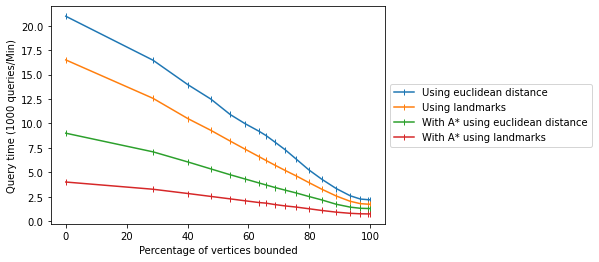

In [174]:
# Investigating the influence of the bound_search_limiter_size (which translates to pre-processing time)
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/denmark"
row_index_time = 2

x_new = [denmark_b_to_bounded(150)/3518897*100, denmark_b_to_bounded(250)/3518897*100]

bound_search_limiters = [0, 50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000, 19400, 31400, 50800, 101600, 203200]
variant = "withoutExternalHeuristic_euclideanDistance"
x_ed = []
y_ed = []
for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i] # !!!! Note this needs to change to do multiple
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    csv_rows = read_csv(path)    
    total_query_time = 0
    count = 0
    for elem in csv_rows[1:]:
        count += 1
        total_query_time += int(elem[row_index_time])
    total_query_time_pr_1000 = total_query_time*(1/count*1000)
    y_ed.append(total_query_time_pr_1000/(6*(10**7)))
    x_ed.append(denmark_b_to_bounded(bound_search_limiter)/3518897*100)
plt.plot(x_ed, y_ed, label = 'Using euclidean distance', marker = '|')

##
bound_search_limiters = [0, 50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000, 19400, 31400, 50800, 101600, 203200]
variant = "withoutExternalHeuristic_landmarks"
x_l = []
y_l = []
for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i] # !!!! Note this needs to change to do multiple
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    csv_rows = read_csv(path)    
    total_query_time = 0
    count = 0
    for elem in csv_rows[1:]:
        count += 1
        total_query_time += int(elem[row_index_time])
    total_query_time_pr_1000 = total_query_time*(1/count*1000)
    y_l.append(total_query_time_pr_1000/(6*(10**7)))
    x_l.append(denmark_b_to_bounded(bound_search_limiter)/3518897*100)
plt.plot(x_l, y_l, label = 'Using landmarks', marker = '|')

bound_search_limiters = [0, 50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000, 19400, 31400, 50800, 101600, 203200]
variant = "withExternalHeuristic_euclideanDistance"
x_aed = []
y_aed = []
for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i]
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    csv_rows = read_csv(path)    
    total_query_time = 0
    count = 0
    for elem in csv_rows[1:]:
        count += 1
        total_query_time += int(elem[row_index_time])
    total_query_time_pr_1000 = total_query_time*(1/count*1000)
    y_aed.append(total_query_time_pr_1000/(6*(10**7)))
    x_aed.append(denmark_b_to_bounded(bound_search_limiter)/3518897*100)
# Draw from not using reach-based algorithm to first level of bounding using reach-based algorithm
#x_none_reach_to_reach_aed = []
#y_none_reach_to_reach_aed = []
#file_name = "/query_experiments_using_bounds_a_star.txt"
#path = folder_path + file_name
#csv_rows = read_csv(path)    
#total_query_time = 0
#for elem in csv_rows[1:]:
#    total_query_time += int(elem[row_index_time])
#y_none_reach_to_reach_aed.append(total_query_time/(6*(10**7)))
#x_none_reach_to_reach_aed.append(0/3518897*100)
#y_none_reach_to_reach_aed.append(y_aed[1])
#x_none_reach_to_reach_aed.append(x_aed[1])
#plt.plot(x_none_reach_to_reach_aed, 
#         y_none_reach_to_reach_aed, 
#         label = 'None reach-based to reach-based: With A* using euclidean distance', 
#         marker = '|')
plt.plot(x_aed, y_aed, label = 'With A* using euclidean distance', marker = '|')


bound_search_limiters = [0, 50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000, 19400, 31400, 50800, 101600, 203200]
variant = "withExternalHeuristic_landmarks"
x_al = []
y_al = []
for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i]
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    csv_rows = read_csv(path)
    total_query_time = 0
    count = 0
    for elem in csv_rows[1:]:
        count += 1
        total_query_time += int(elem[row_index_time])
    total_query_time_pr_1000 = total_query_time*(1/count*1000)
    y_al.append(total_query_time_pr_1000/(6*(10**7)))
    x_al.append(denmark_b_to_bounded(bound_search_limiter)/3518897*100)
# Draw from not using reach-based algorithm to first level of bounding using reach-based algorithm
#x_none_reach_to_reach = []
#y_none_reach_to_reach = []
#file_name = "/query_experiments_using_bounds_landmarks.txt"
#path = folder_path + file_name
#csv_rows = read_csv(path)
#total_query_time = 0
#for elem in csv_rows[1:]:
#    total_query_time += int(elem[row_index_time])
#y_none_reach_to_reach.append(total_query_time/(6*(10**7)))
#x_none_reach_to_reach.append(0/3518897*100)
#y_none_reach_to_reach.append(y_al[1])
#x_none_reach_to_reach.append(x_al[1])
#plt.plot(x_none_reach_to_reach, 
#         y_none_reach_to_reach, 
#         label = 'None reach-based to reach-based: With A* using landmarks', 
#         marker = '|')
# Draw reach-based algorithm
plt.plot(x_al, y_al, label = 'With A* using landmarks', marker = '|')

#y_new = []
#half_of_query_time_speedup = (y_ed[0]+y_ed[-1])/2
#for i in range(len(x_new)):
#    y_new.append(half_of_query_time_speedup)
#plt.plot(x_new, y_new, label = 'Half of speedup: Using euclidean distance', marker = '|')


#y_new = []
#half_of_query_time_speedup = (y_l[0]+y_l[-1])/2
#for i in range(len(x_new)):
#    y_new.append(half_of_query_time_speedup)
#plt.plot(x_new, y_new, label = 'Half of speedup: Using landmarks', marker = '|')


#y_new = []
#half_of_query_time_speedup = (y_aed[0]+y_aed[-1])/2
#for i in range(len(x_new)):
#    y_new.append(half_of_query_time_speedup)
#plt.plot(x_new, y_new, label = 'Half of speedup: A* using euclidean distance', marker = '|')


#y_new = []
#half_of_query_time_speedup = (y_al[0]+y_al[-1])/2
#for i in range(len(x_new)):
#    y_new.append(half_of_query_time_speedup)
#plt.plot(x_new, y_new, label = 'Half of speedup: A* using landmarks', marker = '|')

# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
#plt.xlim(0, 1300)
#plt.ylim(0, 46)
plt.xlabel('Percentage of vertices bounded')
plt.ylabel('Query time (1000 queries/Min)')
#plt.title('Query-time for various levels of boundedness: Reach with A* using Landmarks')
# show
plt.show()

In [97]:
##Make array of preprocessing times
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/denmark"
file_name = "/preprocessingExperiment5.txt"
path = folder_path + file_name
csv_rows = read_csv(path)
row_index_time = 2
preprocessing_time = [int(x[2]) for x in csv_rows[1:]]
aggregate_preprocessing_time_micros = [0]
for i in range(len(preprocessing_time)):
    aggregate_preprocessing_time_micros.append(aggregate_preprocessing_time_micros[i]+preprocessing_time[i])

aggregate_preprocessing_time_seconds = [x/(10**6) for x in aggregate_preprocessing_time_micros]
aggregate_preprocessing_time_minutes = [x/(6*(10**7)) for x in aggregate_preprocessing_time_micros]
aggregate_preprocessing_time_hours = [x/(3.6*(10**9)) for x in aggregate_preprocessing_time_micros]
aggregate_preprocessing_time_days = [x/(8.64*(10**10)) for x in aggregate_preprocessing_time_micros]
aggregate_preprocessing_time_days_rounded = [round(x,1) for x in aggregate_preprocessing_time_days]
#aggregate_preprocessing_time_days,aggregate_preprocessing_time_days_rounded

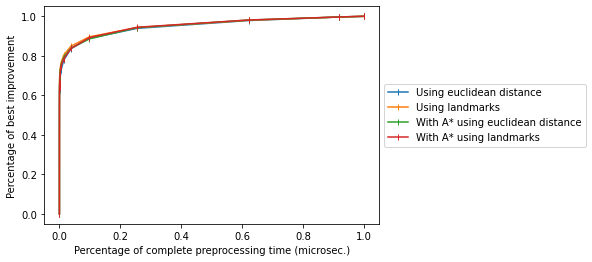

In [175]:
#best_improvement = worst_query_time-best_query_time
#percentage_of_optimal_improvement = (worst_query_time-query_time)/best_improvement
micros = aggregate_preprocessing_time_micros
micros[0] = 1
x = [time/aggregate_preprocessing_time_micros[-1] for time in aggregate_preprocessing_time_micros]


folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/denmark"
row_index_time = 2

bound_search_limiters = [0, 50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000, 19400, 31400, 50800, 101600, 203200]
variant = "withoutExternalHeuristic_euclideanDistance"
total_query_times = []
for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i] # !!!! Note this needs to change to do multiple
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    csv_rows = read_csv(path)    
    total_query_time = 0
    for elem in csv_rows[1:]:
        total_query_time += int(elem[row_index_time])
    total_query_times.append(total_query_time)
total_query_time_0_percent_bounded = total_query_times[0]
total_query_time_100_percent_bounded = total_query_times[-1]
greatest_improvement = total_query_time_0_percent_bounded-total_query_time_100_percent_bounded
y_ed = [(total_query_time_0_percent_bounded-query_time)/greatest_improvement for query_time in total_query_times]
plt.plot(x, y_ed, label = 'Using euclidean distance', marker = '|')

bound_search_limiters = [0, 50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000, 19400, 31400, 50800, 101600, 203200]
variant = "withoutExternalHeuristic_landmarks"
total_query_times = []
for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i] # !!!! Note this needs to change to do multiple
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    csv_rows = read_csv(path)    
    total_query_time = 0
    for elem in csv_rows[1:]:
        total_query_time += int(elem[row_index_time])
    total_query_times.append(total_query_time)
total_query_time_0_percent_bounded = total_query_times[0]
total_query_time_100_percent_bounded = total_query_times[-1]
greatest_improvement = total_query_time_0_percent_bounded-total_query_time_100_percent_bounded
y_ed = [(total_query_time_0_percent_bounded-query_time)/greatest_improvement for query_time in total_query_times]
plt.plot(x, y_ed, label = 'Using landmarks', marker = '|')

bound_search_limiters = [0, 50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000, 19400, 31400, 50800, 101600, 203200]
variant = "withExternalHeuristic_euclideanDistance"
total_query_times = []
for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i] # !!!! Note this needs to change to do multiple
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    csv_rows = read_csv(path)    
    total_query_time = 0
    for elem in csv_rows[1:]:
        total_query_time += int(elem[row_index_time])
    total_query_times.append(total_query_time)
total_query_time_0_percent_bounded = total_query_times[0]
total_query_time_100_percent_bounded = total_query_times[-1]
greatest_improvement = total_query_time_0_percent_bounded-total_query_time_100_percent_bounded
y_ed = [(total_query_time_0_percent_bounded-query_time)/greatest_improvement for query_time in total_query_times]
plt.plot(x, y_ed, label = 'With A* using euclidean distance', marker = '|')

bound_search_limiters = [0, 50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000, 19400, 31400, 50800, 101600, 203200]
variant = "withExternalHeuristic_landmarks"
total_query_times = []
for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i] # !!!! Note this needs to change to do multiple
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    csv_rows = read_csv(path)    
    total_query_time = 0
    for elem in csv_rows[1:]:
        total_query_time += int(elem[row_index_time])
    total_query_times.append(total_query_time)
total_query_time_0_percent_bounded = total_query_times[0]
total_query_time_100_percent_bounded = total_query_times[-1]
greatest_improvement = total_query_time_0_percent_bounded-total_query_time_100_percent_bounded
y_ed = [(total_query_time_0_percent_bounded-query_time)/greatest_improvement for query_time in total_query_times]
plt.plot(x, y_ed, label = 'With A* using landmarks', marker = '|')

# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
#plt.xscale('log')
#plt.xlim(right=10**13)
#plt.xlim(10**0, 10**13)
#plt.ylim(0, 46)

plt.xlabel('Percentage of complete preprocessing time (microsec.)')
plt.ylabel('Percentage of best improvement')
#plt.title('Query-time for various levels of boundedness: Reach with A* using Landmarks')
# show
plt.show()

In [128]:
aggregate_preprocessing_time_str = []
for i in range(0, len(bound_search_limiters)):
    micros = aggregate_preprocessing_time_micros[i]
    if micros == 0:
        aggregate_preprocessing_time_str.append("None")
        continue
    
    days = micros/(8.64*(10**10))
    if days >= 1.:
        days_str = " days" if days > 1 else " day"
        aggregate_preprocessing_time_str.append("<= "+str(math.ceil(days))+days_str if days != 0 else "")
        continue
    
    time_str = ""
    
    hours = math.trunc(micros/(3.6*(10**9)))
    minutes = math.trunc(micros/(6*(10**7))) % 60
    if hours >= 1.:
        time_str = ""
        hours_str = " hours " if hours > 1 else " hours "
        time_str += str(hours)+hours_str if hours != 0 else ""
        minutes_str = " minuts" if minutes > 1 else " minute"
        time_str += str(minutes)+minutes_str if minutes != 0 else ""
        aggregate_preprocessing_time_str.append(time_str)
        continue
        
    seconds = math.trunc(micros/(10**6)) % 60
    minutes_str = " minutes" if minutes > 1 else " minute "
    time_str += str(minutes)+" min " if minutes != 0 else ""
    seconds_str = " seconds" if seconds > 1 else " second"
    time_str += str(seconds)+seconds_str if seconds != 0 else ""
    aggregate_preprocessing_time_str.append(time_str)
    
aggregate_preprocessing_time_str

['None',
 '14 seconds',
 '39 seconds',
 '1 min 55 seconds',
 '3 min 32 seconds',
 '7 min 21 seconds',
 '15 min 24 seconds',
 '29 min 9 seconds',
 '1 hours 12 minuts',
 '2 hours 58 minuts',
 '7 hours 58 minuts',
 '21 hours 14 minuts',
 '<= 3 days',
 '<= 6 days',
 '<= 15 days',
 '<= 22 days',
 '<= 24 days',
 '<= 24 days']

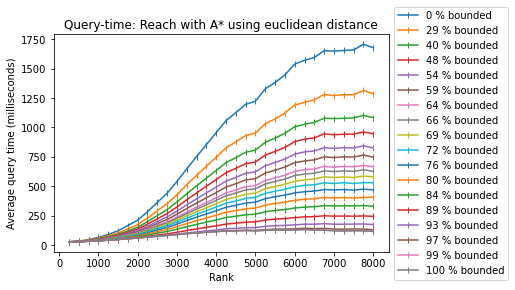

In [171]:
# Investigating the influence of the bound_search_limiter_size (which translates to pre-processing time)
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/denmark"

## Compare astar
#file_name = "/query_experiments_using_bounds_a_star.txt"
#path = folder_path + file_name
#read
#csv_rows = read_csv(path)
#bucket
#row_index_time = 2
#bucket_by_row_index = 0
#increment = 50
#bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
#take average of each bucket
#average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]

#x = list_range(50, (len(average_data)+1)*increment, increment)
#y = average_data

#plt.plot(x, y, label = "b = A*", marker='|')

## Add reach times
bound_search_limiters = [0, 50, 100 , 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000, 19400, 31400, 50800, 101600, 203200]
variant = "withExternalHeuristic_euclideanDistance"
for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i]
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    #read
    csv_rows = read_csv(path)
    #bucket
    row_index_time = 2
    bucket_by_row_index = 0
    increment = 250
    bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
    #take average of each bucket
    average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]
    
    
    x = list_range(increment, (len(average_data)+1)*increment, increment)
    y = average_data

    plt.plot(x, y, label = str(round(denmark_b_to_bounded(bound_search_limiter)/(2510501+1008396)*100))+" % bounded", marker='|')



# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
#plt.yscale('log')
#plt.xlim(0, 1300)
#plt.ylim(0, 46)
plt.xlabel('Rank')
plt.ylabel('Average query time (milliseconds)')
plt.title('Query-time: Reach with A* using euclidean distance')
# show
plt.show()

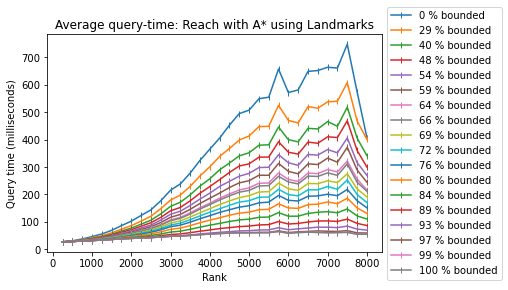

In [56]:
# Investigating the influence of the bound_search_limiter_size (which translates to pre-processing time)
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/denmark"
increment = 250



## Add reach times
bound_search_limiters = [0, 50, 100 , 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000, 19400, 31400, 50800, 101600, 203200]
variant = "withExternalHeuristic_landmarks"

for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i] # !!!! Note this needs to change to do multiple
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    #read
    csv_rows = read_csv(path)
    #bucket
    row_index_time = 2
    bucket_by_row_index = 0
    bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
    #take average of each bucket and make microseconds into milliseconds
    average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]

    x = list_range(increment, (len(average_data)+1)*increment, increment)
    y = average_data

    plt.plot(x, y, label = str(round(denmark_b_to_bounded(bound_search_limiter)/(2510501+1008396)*100))+" % bounded", marker = '|')
#. Preprocessing time: "+aggregate_preprocessing_time_str[i]


# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
#plt.xlim(0, 1300)
#plt.ylim(0, 46)
plt.xlabel('Rank')
plt.ylabel('Query time (milliseconds)')
plt.title('Average query-time: Reach with A* using Landmarks')
# show
plt.show()

In [ ]:
###########
##       ##
## MALTA ##
##       ##
###########

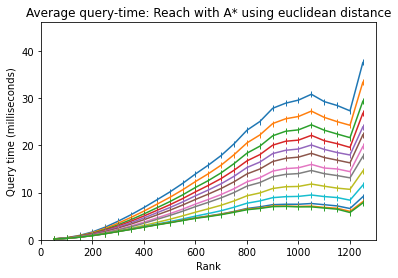

In [11]:
# Investigating the influence of the bound_search_limiter_size (which translates to pre-processing time)
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta"

## Compare astar
file_name = "/query_experiments_using_bounds_a_star.txt"
path = folder_path + file_name
#read
csv_rows = read_csv(path)
#bucket
row_index_time = 2
bucket_by_row_index = 0
increment = 50
bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
#take average of each bucket
average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]

x = list_range(50, (len(average_data)+1)*increment, increment)
y = average_data

plt.plot(x, y, label = "b = A*", marker='|')

## Add reach times
bound_search_limiters = [50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000]
variant = "withExternalHeuristic_euclideanDistance"

for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i]
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    #read
    csv_rows = read_csv(path)
    #bucket
    row_index_time = 2
    bucket_by_row_index = 0
    increment = 50
    bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
    #take average of each bucket
    average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]
    
    
    x = list_range(50, (len(average_data)+1)*increment, increment)
    y = average_data

    plt.plot(x, y, label = "b = "+str(bound_search_limiter), marker='|')



# Show legends
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
#plt.yscale('log')
plt.xlim(0, 1300)
plt.ylim(0, 46)
plt.xlabel('Rank')
plt.ylabel('Query time (milliseconds)')
plt.title('Average query-time: Reach with A* using euclidean distance')
# show
plt.show()

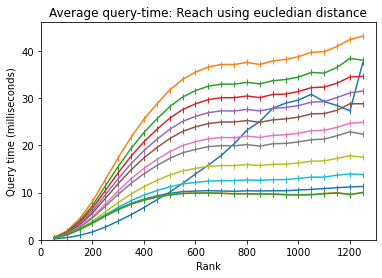

In [12]:
# Investigating the influence of the bound_search_limiter_size (which translates to pre-processing time)
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta"


## Compare astar
file_name = "/query_experiments_using_bounds_a_star.txt"
path = folder_path + file_name
#read
csv_rows = read_csv(path)
#bucket
row_index_time = 2
bucket_by_row_index = 0
increment = 50
bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
#take average of each bucket and make microseconds into milliseconds
average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]

x = list_range(50, (len(average_data)+1)*increment, increment)
y = average_data

plt.plot(x, y, label = "A*", marker = '|')

## Add reach times
bound_search_limiters = [50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000]
variant = "withoutExternalHeuristic_euclideanDistance"

for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i] # !!!! Note this needs to change to do multiple
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    #read
    csv_rows = read_csv(path)
    #bucket
    row_index_time = 2
    bucket_by_row_index = 0
    bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
    #take average of each bucket and make microseconds into milliseconds
    average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]

    x = list_range(50, (len(average_data)+1)*increment, increment)
    y = average_data

    plt.plot(x, y, label = "b = "+str(bound_search_limiter), marker = '|')



# Show legends
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlim(0, 1300)
plt.ylim(0, 46)
plt.xlabel('Rank')
plt.ylabel('Query time (milliseconds)')
plt.title('Average query-time: Reach using eucledian distance')
# show
plt.show()

In [9]:
def malta_b_to_unbounded(x):
    return {
        50: 88048,
        100: 77821,
        150: 70935,
        250: 64414,
        400: 58665, 
        800: 51288,
        1000: 47175,
        1800: 38020,
        2800: 28151,
        4600: 16741,
        7400: 6168,
        12000: 0,
        19400: 0,
        31400: 0,
        50800: 0
    }[x]

In [11]:
def malta_b_to_bounded(x):
    return {
        0: 0,
        50: 16905,
        100: 27132,
        150: 34018,
        250: 40539,
        400: 46288, 
        800: 53665,
        1000: 57778,
        1800: 66933,
        2800: 76802,
        4600: 88212,
        7400: 98785,
        12000: 104953,
        19400: 104953,
        31400: 104953,
        50800: 104953
    }[x]

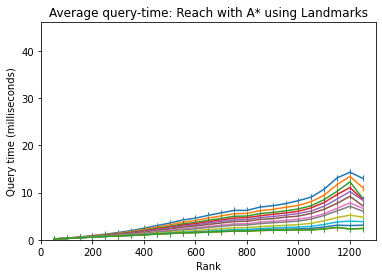

In [26]:
# Investigating the influence of the bound_search_limiter_size (which translates to pre-processing time)
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta"
increment = 50

## Compare landmarks
file_name = "/query_experiments_using_bounds_landmarks.txt"
path = folder_path + file_name
#read
csv_rows = read_csv(path)
#bucket
row_index_time = 2
bucket_by_row_index = 0

bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
#take average of each bucket and make microseconds into milliseconds
average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]

x = list_range(50, (len(average_data)+1)*increment, increment)
y = average_data

plt.plot(x, y, label = "Landmarks", marker = '|')

## Add reach times
bound_search_limiters = [50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000]
variant = "withExternalHeuristic_landmarks"

for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i] # !!!! Note this needs to change to do multiple
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    #read
    csv_rows = read_csv(path)
    #bucket
    row_index_time = 2
    bucket_by_row_index = 0
    bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
    #take average of each bucket and make microseconds into milliseconds
    average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]

    x = list_range(50, (len(average_data)+1)*increment, increment)
    y = average_data

    plt.plot(x, y, label = "b: "+str(bound_search_limiter), marker = '|')



# Show legends
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlim(0, 1300)
plt.ylim(0, 46)
plt.xlabel('Rank')
plt.ylabel('Query time (milliseconds)')
plt.title('Average query-time: Reach with A* using Landmarks')
# show
plt.show()

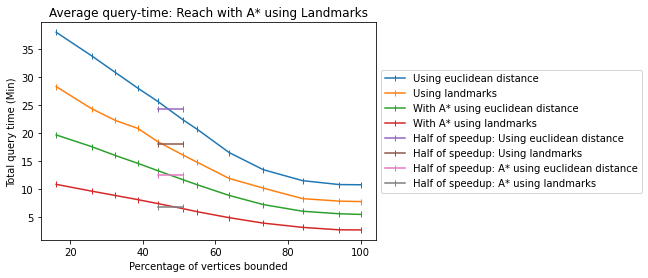

In [25]:
# Investigating the influence of the bound_search_limiter_size (which translates to pre-processing time)
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta"
row_index_time = 2
bound_search_limiters = [50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000]

x_new = [malta_b_to_bounded(400)/104953*100, malta_b_to_bounded(800)/104953*100]

variant = "withoutExternalHeuristic_euclideanDistance"
x_ed = []
y_ed = []
for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i] # !!!! Note this needs to change to do multiple
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    #read
    csv_rows = read_csv(path)
    
    total_query_time = 0
    for elem in csv_rows[1:]:
        total_query_time += int(elem[row_index_time])
    y_ed.append(total_query_time/(6*(10**7)))
    x_ed.append(malta_b_to_bounded(bound_search_limiter)/104953*100)
plt.plot(x_ed, y_ed, label = 'Using euclidean distance', marker = '|')

##
variant = "withoutExternalHeuristic_landmarks"
x_l = []
y_l = []
for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i] # !!!! Note this needs to change to do multiple
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    #read
    csv_rows = read_csv(path)
    
    total_query_time = 0
    for elem in csv_rows[1:]:
        total_query_time += int(elem[row_index_time])
    y_l.append(total_query_time/(6*(10**7)))
    x_l.append(malta_b_to_bounded(bound_search_limiter)/104953*100)
plt.plot(x_l, y_l, label = 'Using landmarks', marker = '|')


variant = "withExternalHeuristic_euclideanDistance"
x_aed = []
y_aed = []
for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i] # !!!! Note this needs to change to do multiple
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    #read
    csv_rows = read_csv(path)
    
    total_query_time = 0
    for elem in csv_rows[1:]:
        total_query_time += int(elem[row_index_time])
    y_aed.append(total_query_time/(6*(10**7)))
    x_aed.append(malta_b_to_bounded(bound_search_limiter)/104953*100)
plt.plot(x_aed, y_aed, label = 'With A* using euclidean distance', marker = '|')


variant = "withExternalHeuristic_landmarks"
x_al = []
y_al = []
for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i] # !!!! Note this needs to change to do multiple
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    #read
    csv_rows = read_csv(path)
    
    total_query_time = 0
    for elem in csv_rows[1:]:
        total_query_time += int(elem[row_index_time])
    y_al.append(total_query_time/(6*(10**7)))
    x_al.append(malta_b_to_bounded(bound_search_limiter)/104953*100)
plt.plot(x_al, y_al, label = 'With A* using landmarks', marker = '|')



y_new = []
half_of_query_time_speedup = (y_ed[0]+y_ed[-1])/2
for i in range(len(x_new)):
    y_new.append(half_of_query_time_speedup)
plt.plot(x_new, y_new, label = 'Half of speedup: Using euclidean distance', marker = '|')

y_new = []
half_of_query_time_speedup = (y_l[0]+y_l[-1])/2
for i in range(len(x_new)):
    y_new.append(half_of_query_time_speedup)
plt.plot(x_new, y_new, label = 'Half of speedup: Using landmarks', marker = '|')


y_new = []
half_of_query_time_speedup = (y_aed[0]+y_aed[-1])/2
for i in range(len(x_new)):
    y_new.append(half_of_query_time_speedup)
plt.plot(x_new, y_new, label = 'Half of speedup: A* using euclidean distance', marker = '|')


y_new = []
half_of_query_time_speedup = (y_al[0]+y_al[-1])/2
for i in range(len(x_new)):
    y_new.append(half_of_query_time_speedup)
plt.plot(x_new, y_new, label = 'Half of speedup: A* using landmarks', marker = '|')

# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
#plt.xlim(0, 1300)
#plt.ylim(0, 46)
plt.xlabel('Percentage of vertices bounded')
plt.ylabel('Total query time (Min)')
plt.title('Average query-time: Reach with A* using Landmarks')
# show
plt.show()

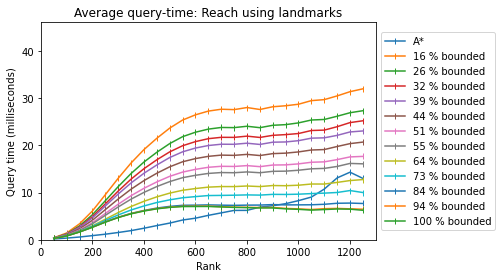

In [10]:
# Investigating the influence of the bound_search_limiter_size (which translates to pre-processing time)
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta"
increment = 50

## Compare landmarks
file_name = "/query_experiments_using_bounds_landmarks.txt"
path = folder_path + file_name
#read
csv_rows = read_csv(path)
#bucket
row_index_time = 2
bucket_by_row_index = 0

bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
#take average of each bucket and make microseconds into milliseconds
average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]

x = list_range(50, (len(average_data)+1)*increment, increment)
y = average_data

plt.plot(x, y, label = "A*", marker = '|')

## Add reach times
bound_search_limiters = [50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000]
variant = "withoutExternalHeuristic_landmarks"

for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i] # !!!! Note this needs to change to do multiple
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    #read
    csv_rows = read_csv(path)
    #bucket
    row_index_time = 2
    bucket_by_row_index = 0
    bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
    #take average of each bucket and make microseconds into milliseconds
    average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]

    x = list_range(50, (len(average_data)+1)*increment, increment)
    y = average_data

    plt.plot(x, y, label = str(round(malta_b_to_bounded(bound_search_limiter)/104953*100))+' % bounded', marker = '|')



# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlim(0, 1300)
plt.ylim(0, 46)
plt.xlabel('Rank')
plt.ylabel('Query time (milliseconds)')
plt.title('Average query-time: Reach using landmarks')
# show
plt.show()

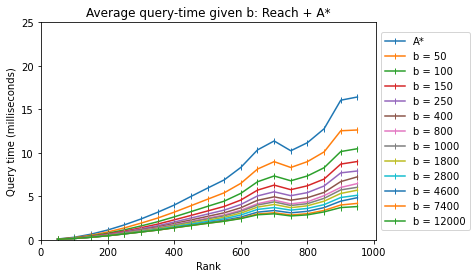

In [52]:
# Investigating the influence of the bound_search_limiter_size (which translates to pre-processing time)
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/bornholm"
increment = 50


## Compare astar
file_name = "/query_experiments_using_bounds_a_star.txt"
path = folder_path + file_name
#read
csv_rows = read_csv(path)
#bucket
row_index_time = 2
bucket_by_row_index = 0
bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
#take average of each bucket and make microseconds into milliseconds
average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]

x = list_range(50, (len(average_data)+1)*increment, increment)
y = average_data

plt.plot(x, y, label = "A*", marker = '|')

## Add reach times
bound_search_limiters = [50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000]
variant = "withExternalHeuristic_euclideanDistance"

for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i] # !!!! Note this needs to change to do multiple
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    #read
    csv_rows = read_csv(path)
    #bucket
    row_index_time = 2
    bucket_by_row_index = 0
    bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
    #take average of each bucket and make microseconds into milliseconds
    average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]

    x = list_range(50, (len(average_data)+1)*increment, increment)
    y = average_data

    plt.plot(x, y, label = "b = "+str(bound_search_limiter), marker = '|')



# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlim(0, 1005)
plt.ylim(0, 25)

plt.xlabel('Rank')
plt.ylabel('Query time (milliseconds)')
plt.title('Average query-time given b: Reach + A*')
# show
plt.show()

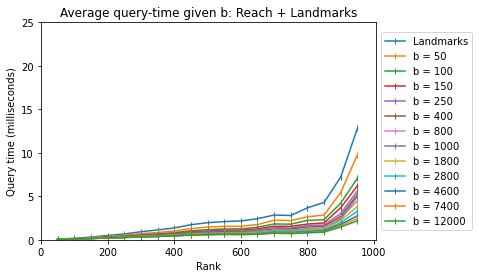

In [8]:
# Investigating the influence of the bound_search_limiter_size (which translates to pre-processing time)
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/bornholm"
increment = 50

## Compare landmarks
file_name = "/query_experiments_using_bounds_landmarks.txt"
path = folder_path + file_name
#read
csv_rows = read_csv(path)
#bucket
row_index_time = 2
bucket_by_row_index = 0

bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
#take average of each bucket and make microseconds into milliseconds
average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]

x = list_range(50, (len(average_data)+1)*increment, increment)
y = average_data

plt.plot(x, y, label = "Landmarks", marker='|')

## Add reach times
bound_search_limiters = [50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000]
variant = "withExternalHeuristic_landmarks"

for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i] # !!!! Note this needs to change to do multiple
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    #read
    csv_rows = read_csv(path)
    #bucket
    row_index_time = 2
    bucket_by_row_index = 0
    bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
    #take average of each bucket and make microseconds into milliseconds
    average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]

    x = list_range(50, (len(average_data)+1)*increment, increment)
    y = average_data

    plt.plot(x, y, label = "b = "+str(bound_search_limiter), marker='|')



# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
#plt.yscale('log')
plt.xlim(0, 1005)
plt.ylim(0, 25)
plt.xlabel('Rank')
plt.ylabel('Query time (milliseconds)')
plt.title('Average query-time given b: Reach + Landmarks')
# show
plt.show()

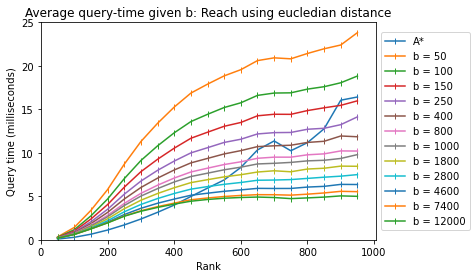

In [43]:
# Investigating the influence of the bound_search_limiter_size (which translates to pre-processing time)
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/bornholm"

increment = 50


## Compare astar
file_name = "/query_experiments_using_bounds_a_star.txt"
path = folder_path + file_name
#read
csv_rows = read_csv(path)
#bucket
row_index_time = 2
bucket_by_row_index = 0
bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
#take average of each bucket and make microseconds into milliseconds
average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]

x = list_range(50, (len(average_data)+1)*increment, increment)
y = average_data

plt.plot(x, y, label = "A*", marker='|')

## Add reach times
bound_search_limiters = [50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000]
variant = "withoutExternalHeuristic_euclideanDistance"

for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i] # !!!! Note this needs to change to do multiple
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    #read
    csv_rows = read_csv(path)
    #bucket
    row_index_time = 2
    bucket_by_row_index = 0
    bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
    #take average of each bucket and make microseconds into milliseconds
    average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]

    x = list_range(50, (len(average_data)+1)*increment, increment)
    y = average_data

    plt.plot(x, y, label = "b = "+str(bound_search_limiter), marker='|')



# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlim(0, 1005)
plt.ylim(0, 25)
plt.xlabel('Rank')
plt.ylabel('Query time (milliseconds)')
plt.title('Average query-time given b: Reach using eucledian distance')
# show
plt.show()

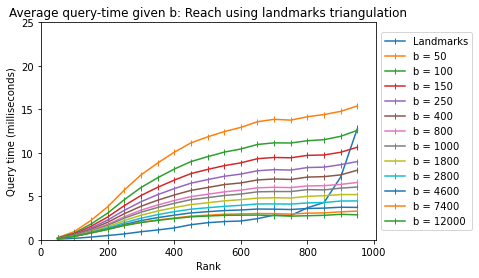

In [46]:
# Investigating the influence of the bound_search_limiter_size (which translates to pre-processing time)
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/bornholm"
increment = 50

## Compare landmarks
file_name = "/query_experiments_using_bounds_landmarks.txt"
path = folder_path + file_name
#read
csv_rows = read_csv(path)
#bucket
row_index_time = 2
bucket_by_row_index = 0

bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
#take average of each bucket and make microseconds into milliseconds
average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]

x = list_range(50, (len(average_data)+1)*increment, increment)
y = average_data

plt.plot(x, y, label = "Landmarks", marker='|')

## Add reach times

bound_search_limiters = [50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000]
variant = "withoutExternalHeuristic_landmarks"

for i in range(0, len(bound_search_limiters)):
    bound_search_limiter = bound_search_limiters[i] # !!!! Note this needs to change to do multiple
    file_name = "/2query_experiments_using_bounds_" + str(bound_search_limiter) + "_"+ variant + ".txt"
    path = folder_path + file_name
    #read
    csv_rows = read_csv(path)
    #bucket
    row_index_time = 2
    bucket_by_row_index = 0
    bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
    #take average of each bucket and make microseconds into milliseconds
    average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]

    x = list_range(50, (len(average_data)+1)*increment, increment)
    y = average_data

    plt.plot(x, y, label = "b = "+str(bound_search_limiter), marker='|')



# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlim(0, 1005)
plt.ylim(0, 25)
plt.xlabel('Rank')
plt.ylabel('Query time (milliseconds)')
plt.title('Average query-time given b: Reach using landmarks triangulation')
# show
plt.show()

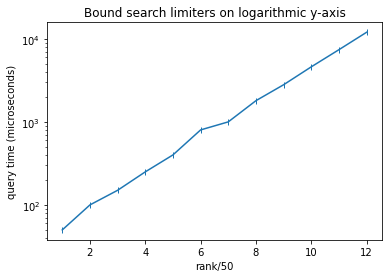

In [35]:
B = [50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000]
x = list_range(1, len(B)+1)
y = B

plt.plot(x, y, label = "b = "+str(bound_search_limiter), marker='|')

# naming
plt.xlabel('rank/'+str(increment))
plt.ylabel('query time (microseconds)')
plt.title('Bound search limiters on logarithmic y-axis')
plt.yscale('log')
# show
plt.show()

In [42]:
def csv_to_list(csv_rows, row_index):
    lst = []
    for row in csv_rows:
        lst.append(int(row[row_index]))
    return lst

[3652.12, 12529.693, 37409.263, 112489.071, 234714.734, 619362.017, 1359547.326, 3450939.125, 6963917.73, 10895678.495, 12749109.159, 12920773.103]


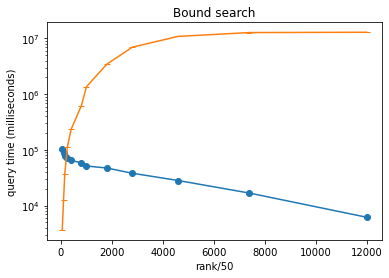

In [76]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta"
file_name = "/preprocessingExperiment1.txt"
path = folder_path+file_name
csv_rows = read_csv(path)
bounds = csv_to_list(csv_rows[1:], 0)
unbounded = csv_to_list(csv_rows[1:], 1)
bounded = csv_to_list(csv_rows[1:], 2)
times = csv_to_list(csv_rows[1:], 3)
for i in range(1,len(times)):
    times[i] = times[i] + times[i-1]

x = bounds[:12]
y = [x/1000 for x in times[:12]]

for i in range(12, 0, -1):
    unbounded[i] = unbounded[i-1]
unbounded[0] += bounded[0]

plt.plot(x, unbounded[:12], label = "Preprocessing time using the bounds of the experiment", marker='o')
plt.plot(x, y, label = "Preprocessing time using the bounds of the experiment", marker='_')
print(y)
# naming

plt.xlabel('rank/'+str(increment))
plt.ylabel('query time (milliseconds)')
plt.title('Bound search')
plt.yscale('log')
# show
plt.show()

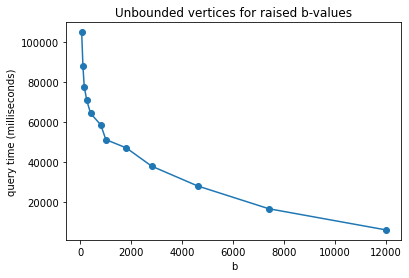

In [80]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta"
file_name = "/preprocessingExperiment1.txt"
path = folder_path+file_name
csv_rows = read_csv(path)
bounds = csv_to_list(csv_rows[1:], 0)
unbounded = csv_to_list(csv_rows[1:], 1)
bounded = csv_to_list(csv_rows[1:], 2)
times = csv_to_list(csv_rows[1:], 3)
for i in range(1,len(times)):
    times[i] = times[i] + times[i-1]

x = bounds[:12]
y = [x/1000 for x in times[:12]]

for i in range(12, 0, -1):
    unbounded[i] = unbounded[i-1]
unbounded[0] += bounded[0]

plt.plot(x, unbounded[:12], label = "Preprocessing time using the bounds of the experiment", marker='o')
# naming

plt.xlabel('b')
plt.ylabel('query time (milliseconds)')
plt.title('Unbounded vertices for raised b-values')
# show
plt.show()

In [36]:
times = [1, 2, 3, 4]
for i in range(1,len(times)):
    times[i] = times[i] + times[i-1]
times

[1, 3, 6, 10]

In [85]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta"
file_name = "/preprocessingExperiment1.txt"
path = folder_path+file_name
csv_rows = read_csv(path)
bounds = csv_to_list(csv_rows[1:], 0)
times = csv_to_list(csv_rows[1:], 3)
print(bounds[11])
time_to_1800 = 0
for i in range(0,8):
    time_to_1800 += times[i]
time_from_2800 = 0
for i in range(8,12):
    time_from_2800 += times[i]
print(time_to_1800)
print(time_from_2800)
    

12000
3450939125
9469833978


In [4]:

for selected in [1, 2, 4, 8, 16, 32, 64]:
    for picked in [1, 2, 3, 4, 5, 6]:
        if (picked <= selected):
            file_name = "malta_ED/Selected"+str(selected)+"Picked"+str(picked)+".txt"
            print(file_name)

malta_ED/Selected1Picked1.txt
malta_ED/Selected2Picked1.txt
malta_ED/Selected2Picked2.txt
malta_ED/Selected4Picked1.txt
malta_ED/Selected4Picked2.txt
malta_ED/Selected4Picked3.txt
malta_ED/Selected4Picked4.txt
malta_ED/Selected8Picked1.txt
malta_ED/Selected8Picked2.txt
malta_ED/Selected8Picked3.txt
malta_ED/Selected8Picked4.txt
malta_ED/Selected8Picked5.txt
malta_ED/Selected8Picked6.txt
malta_ED/Selected16Picked1.txt
malta_ED/Selected16Picked2.txt
malta_ED/Selected16Picked3.txt
malta_ED/Selected16Picked4.txt
malta_ED/Selected16Picked5.txt
malta_ED/Selected16Picked6.txt
malta_ED/Selected32Picked1.txt
malta_ED/Selected32Picked2.txt
malta_ED/Selected32Picked3.txt
malta_ED/Selected32Picked4.txt
malta_ED/Selected32Picked5.txt
malta_ED/Selected32Picked6.txt
malta_ED/Selected64Picked1.txt
malta_ED/Selected64Picked2.txt
malta_ED/Selected64Picked3.txt
malta_ED/Selected64Picked4.txt
malta_ED/Selected64Picked5.txt
malta_ED/Selected64Picked6.txt


In [ ]:
for selected in [1, 2, 4, 8, 16, 32, 64]:
    for picked in [1, 2, 3, 4, 5, 6]:
        if (picked <= selected):
            file_name = "malta_ED/Selected"+str(selected)+"Picked"+str(picked)+".txt"
            path =  file_name
            #read
            csv_rows = read_csv(path)
            #bucket
            row_index_time = 8
            bucket_by_row_index = 0
            increment = 50
            bucketed_data = bucket(csv_rows, bucket_by_row_index, increment, row_index_time)
            #take average of each bucket
            average_data = [x/1000 for x in average_list_of_lists(bucketed_data)]

            x = list_range(50, (len(average_data)+1)*increment, increment)
            y = average_data
            
            plt.plot(x, y, label = "Selected"+str(selected)+" Picked"+str(picked), marker='|')


plt.xlabel('rank')
plt.ylabel('query time (milliseconds)')
plt.legend(loc='upper left')
plt.show()